# Visualization of the simulation outputs

To understand the concrete impacts of a set of policy inputs on the transporation network, we have provided an utility called `visualization.py` (located in the `/utilities` folder) to **process** and **visualize the inputs and outputs of each BISTRO run**. <br> In this notebook, we demonstrate the use of the script with the BAU scenario but you can use it for any other BISTRO run by adapting the paths accordingly.

*Note*: It is assumed that this notebook is started from the `/example` folder.

The notebook is organized as follows:<br><br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing the data</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inputs</a></span><ul class="toc-item"><li><span><a href="#Incentives" data-toc-modified-id="Incentives-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Incentives</a></span></li><li><span><a href="#FleetMix" data-toc-modified-id="FleetMix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>FleetMix</a></span></li><li><span><a href="#Fares" data-toc-modified-id="Fares-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fares</a></span></li><li><span><a href="#Bus-frequency" data-toc-modified-id="Bus-frequency-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Bus frequency</a></span></li></ul></li><li><span><a href="#Scores" data-toc-modified-id="Scores-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scores</a></span></li><li><span><a href="#Mode-choice" data-toc-modified-id="Mode-choice-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mode choice</a></span><ul class="toc-item"><li><span><a href="#Overall-mode-choice" data-toc-modified-id="Overall-mode-choice-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Overall mode choice</a></span></li><li><span><a href="#Mode-Choice-by-hour-of-the-day" data-toc-modified-id="Mode-Choice-by-hour-of-the-day-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Mode Choice by hour of the day</a></span></li><li><span><a href="#Mode-Choice-per-income-group" data-toc-modified-id="Mode-Choice-per-income-group-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Mode Choice per income group</a></span></li><li><span><a href="#Mode-Choice-per-age-group" data-toc-modified-id="Mode-Choice-per-age-group-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Mode Choice per age group</a></span></li></ul></li><li><span><a href="#Accessibility" data-toc-modified-id="Accessibility-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Accessibility</a></span><ul class="toc-item"><li><span><a href="#Work-based-trips" data-toc-modified-id="Work-based-trips-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Work-based trips</a></span></li><li><span><a href="#Secondary-locations-trips" data-toc-modified-id="Secondary-locations-trips-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Secondary locations trips</a></span></li></ul></li><li><span><a href="#Level-of-service" data-toc-modified-id="Level-of-service-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Level of service</a></span><ul class="toc-item"><li><span><a href="#Travel-expenditure" data-toc-modified-id="Travel-expenditure-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Travel expenditure</a></span></li><li><span><a href="#Bus-crowding" data-toc-modified-id="Bus-crowding-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Bus crowding</a></span></li></ul></li><li><span><a href="#Congestion" data-toc-modified-id="Congestion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Congestion</a></span><ul class="toc-item"><li><span><a href="#Average-travel-time-by-mode" data-toc-modified-id="Average-travel-time-by-mode-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Average travel time by mode</a></span></li><li><span><a href="#Travel-time-by-mode-over-the-day" data-toc-modified-id="Travel-time-by-mode-over-the-day-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Travel time by mode over the day</a></span></li></ul></li><li><span><a href="#Costs-and-Benefits-of-Mass-Transit-Level-of-Service-Intervention" data-toc-modified-id="Costs-and-Benefits-of-Mass-Transit-Level-of-Service-Intervention-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Costs and Benefits of Mass Transit Level of Service Intervention</a></span></li><li><span><a href="#Sustainability" data-toc-modified-id="Sustainability-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Sustainability</a></span></li></ul></div>

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cm import ScalarMappable
import seaborn as sns
sns.set()
%matplotlib inline

# Adding the module to the path for future import
# Note that the following is idempotent when this notebook is run from "/examples"
import sys
import os
from os import path
from pathlib import Path
os.chdir('../utilities')
import visualization as viz
import plans_parser as parser

import tqdm
import math

# To parse .xml output files
from lxml import etree


%load_ext autoreload
%autoreload 2

## Importing the data 

To use this notebook for other scenarios than the BAU, change: <br> 
* the `path_output_folder` of the run (`sioux_faux-<sample_size>__<date and time>` folder) <br>
* the `iter_number` (number of iterations of the run: integer)
* the `SAMPLE_SIZE` (sample size of the simulated scenario: str, '1k' or '15k')

In [7]:
COMPETITION = "competition"
SUBMISSION_INPUTS = "submission-inputs"
ITERS = "ITERS"

path_input = (Path.cwd().parent / "submission-inputs").absolute()

# ********** CHANGE SAMPLE_SIZE *******************#
# 1k or 15k
SAMPLE_SIZE = '15k'

# ********** CHANGE iter_number *******************#
iter_number = 20
ITER_FOLDER = f"it.{iter_number}"

# PATHS TO BAU DATA 
# 1.ouput folder
path_output_folder_bau = (Path.cwd().parent / f"reference-data/sioux_faux/bau/warm-start/sioux_faux-{SAMPLE_SIZE}__warm-start").absolute()
path_output_folder_bau = viz.unzip_file(path_output_folder_bau)

# 2. stats csv file
path_bau_stats = (Path.cwd().parent / f"reference-data/sioux_faux/bau/stats/summaryStats-{SAMPLE_SIZE}.csv").absolute()
path_bau_linkstats_file = (Path.cwd().parent / "reference-data/sioux_faux/bau/linkstats/100.linkstats_bau-15k.csv.gz").absolute()

# 3. Network and population files
path_network_file = Path.cwd().parent / "reference-data/sioux_faux/fixed-data/sioux_faux/config/physsim-network.xml"
path_population_file = Path.cwd().parent / "reference-data/sioux_faux/fixed-data/sioux_faux/config/{SAMPLE_SIZE}/population.xml.gz"

# ********** CHANGE PATH OUTPUT FOLDER (PosixPath)*****************#
# Output folder of simulation (`sioux_faux-<sample_size>__<date and time>` folder)
path_output_folder = Path.cwd().parent / "examples" / r"example_run_output_folder"



Defining some fixed variables for inputs

In [8]:
max_incentive = 50
max_income = 150000
max_age = 120
max_fare = 10
transit_scale_factor = 0.1

poi_types = ['work', 'secondary']
time_ranges = {'morning peak': range(7, 10), "evening peak": range(17, 20)}
max_time = 900
utm_zone = "14N"

#Importing Bus Fare input file
bus_fare_data = path_bau_stats / "submission-inputs/MassTransitFares.csv"

#Importing agencies ids from agency.txt
agency_ids = pd.read_csv(Path.cwd().parent / "reference-data/sioux_faux/sioux_faux_bus_lines/gtfs_data/agency.txt")
agency_ids = agency_ids["agency_id"].tolist()

# Importing route ids from `routes.txt`
route_df = pd.read_csv(Path.cwd().parent / "reference-data/sioux_faux/sioux_faux_bus_lines/gtfs_data/routes.txt")
route_ids = route_df["route_id"].sort_values(ascending = True).tolist()

# Importing vehicle types and seating capacities from `availableVehicleTypes.csv` file
available_vehicle_types = pd.read_csv(Path.cwd().parent / "reference-data/sioux_faux/sioux_faux_bus_lines/availableVehicleTypes.csv")

buses_list = available_vehicle_types["vehicleTypeId"][1:].tolist()
seating_capacities = available_vehicle_types[["vehicleTypeId", "seatingCapacity"]].set_index("vehicleTypeId", drop=True).T.to_dict("records")[0]

# Extracting Operational costs per bus type from the `vehicleCosts.csv` file
operational_costs = pd.read_csv(Path.cwd().parent / "reference-data/sioux_faux/sioux_faux_bus_lines/vehicleCosts.csv")
operational_costs = operational_costs[["vehicleTypeId", "opAndMaintCost"]].set_index("vehicleTypeId", drop=True).T.to_dict("records")[0]

# Extracting route_id / trip_id correspondance from the `trips.csv` file
trips = pd.read_csv(Path.cwd().parent / "reference-data/sioux_faux/sioux_faux_bus_lines/gtfs_data/trips.txt")
trip_to_route = trips[["trip_id", "route_id"]].set_index("trip_id", drop=True).T.to_dict('records')[0]

Generating the `.csv` files from the `.xml` files for the BAU scenario (`path_output_folder_bau`). <br> Note: this process might take up to 10 minutes to parse if it was not already done. We know that it is not optimal so if you want to improve the plans_parser.py module, feel free to submit some code in a Pull Request. It will give you points for the Citizenship Prize! ;-)

In [9]:
# Importing all xml.gz files from the output folder of the run
events_data = path_output_folder_bau / "outputEvents.xml.gz"
output_plans_data = path_output_folder_bau / "outputPlans.xml.gz"
plans_data = path_output_folder_bau / ITERS / ITER_FOLDER / f"{iter_number}.experiencedPlans.xml.gz"
persons_data = path_output_folder_bau / "outputPersonAttributes.xml.gz"
hhd_data = path_output_folder_bau / "outputHouseholds.xml.gz"

# Check if the xml files were already parsed and converted to csv files or not 
if not Path(path_output_folder_bau / "trips_dataframe.csv").exists():
# Parsing and creating the csv files in the output folder
    bus_fares_data = path_output_folder_bau / COMPETITION / SUBMISSION_INPUTS / "FrequencyAdjustment.csv"
    parser.output_parse(output_plans_data, persons_data, hhd_data, plans_data, events_data, bus_fares_data, route_ids, trip_to_route, path_output_folder_bau)

# Get the data from the generated csv files
routes_df_bau = pd.read_csv(Path.cwd().parent / "reference-data/sioux_faux/sioux_faux_bus_lines/gtfs_data/trips.txt")
trips_df_bau = pd.read_csv(path_output_folder_bau / "trips_dataframe.csv")
person_df_bau = pd.read_csv(path_output_folder_bau / "persons_dataframe.csv")
activities_df_bau = pd.read_csv(path_output_folder_bau / "activities_dataframe.csv")
legs_df_bau = pd.read_csv(path_output_folder_bau / "legs_dataframe.csv")
paths_traversals_df_bau = pd.read_csv(path_output_folder_bau / "path_traversals_dataframe.csv")


Let's do the same thing fot the `.xml` files in the `path_output_folder` of the run you want to compare to the BAU. <br> Note: this process might take up to 10 minutes to parse if it was not already done. We know that it is not optimal so if you want to improve the plans_parser.py module, feel free to submit some code in a Pull Request. It will give you points for the Citizenship Prize! ;-)

In [10]:
# Importing all xml.gz files from the output folder of the run
events_data = path_output_folder / "outputEvents.xml.gz"
output_plans_data = path_output_folder / "outputPlans.xml.gz"
plans_data = path_output_folder / ITERS / ITER_FOLDER / f"{iter_number}.experiencedPlans.xml.gz"
persons_data = path_output_folder / "outputPersonAttributes.xml.gz"
hhd_data = path_output_folder / "outputHouseholds.xml.gz"

# Check if the xml files were already parsed and converted to csv files or not 
if not Path(path_output_folder / "trips_dataframe.csv").exists():
# Parsing and creating the csv files in the output folder
    bus_fares_data = path_output_folder / COMPETITION / SUBMISSION_INPUTS / "FrequencyAdjustment.csv"
    parser.output_parse(output_plans_data, persons_data, hhd_data, plans_data, events_data, bus_fares_data, route_ids, trip_to_route, path_output_folder)

# Get the data from the generated csv files
routes_df = pd.read_csv(Path.cwd().parent / "reference-data/sioux_faux/sioux_faux_bus_lines/gtfs_data/trips.txt")
trips_df = pd.read_csv(path_output_folder / "trips_dataframe.csv")
person_df = pd.read_csv(path_output_folder / "persons_dataframe.csv")
activities_df = pd.read_csv(path_output_folder / "activities_dataframe.csv")
legs_df = pd.read_csv(path_output_folder / "legs_dataframe.csv")
paths_traversals_df = pd.read_csv(path_output_folder / "path_traversals_dataframe.csv")


person_dataframe.csv generated
activities_dataframe.csv generated


FileNotFoundError: [Errno 2] No such file or directory: '/Users/vgolfi/Documents/GitHub/Uber-Prize-Starter-Kit/examples/example_run_output_folder/outputEvents.xml.gz'

## Inputs

### Incentives

Importing the `ModeIncentives.csv ` input file for the BAU scenario and your new scenario.

In [11]:
incentives_path_bau = path_output_folder_bau / COMPETITION / SUBMISSION_INPUTS / "ModeIncentives.csv"
incentives_path = path_output_folder / COMPETITION / SUBMISSION_INPUTS / "ModeIncentives.csv"


Plotting the `incentives` inputs for the BAU scenario and your new scenario. <br>For the BAU, no incentives are provided. 

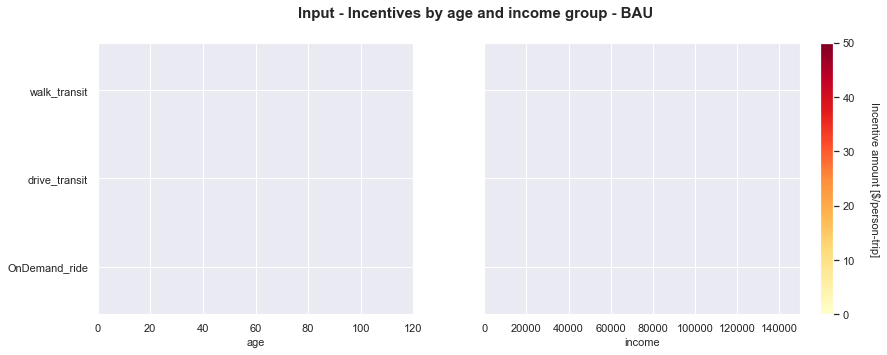

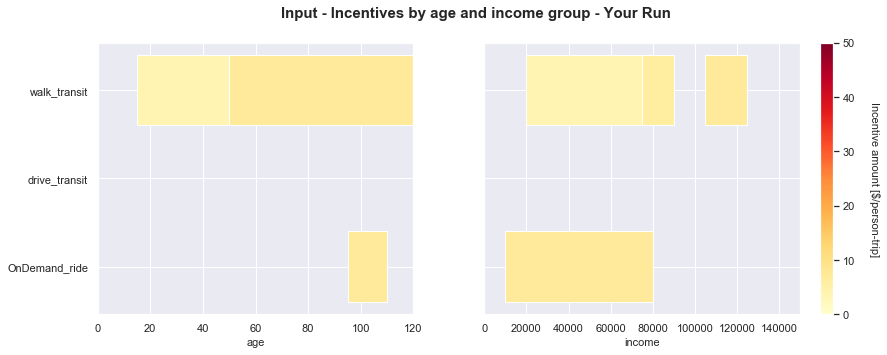

In [12]:
_ = viz.plot_incentives_inputs(incentives_path_bau, max_incentive, max_age, max_income, "BAU")
_ = viz.plot_incentives_inputs(incentives_path, max_incentive, max_age, max_income, "Your Run")

### FleetMix

Importing the `FleetMix.csv ` input file

In [13]:
fleet_mix_path_bau =  path_output_folder_bau / COMPETITION / SUBMISSION_INPUTS / "VehicleFleetMix.csv"
fleet_mix_path =  path_output_folder / COMPETITION / SUBMISSION_INPUTS / "VehicleFleetMix.csv"


Plotting the `vehicle fleet mix` inputs for the BAU scenario and your new scenario. <br>For the BAU, all bus lines are operating with `BUS-DEFAULT` buses. 

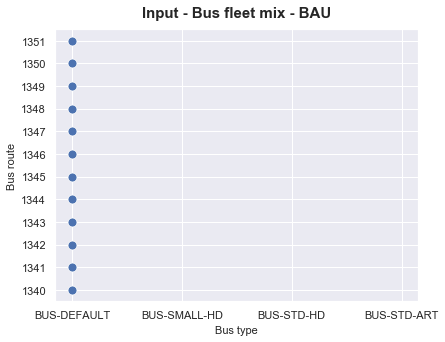

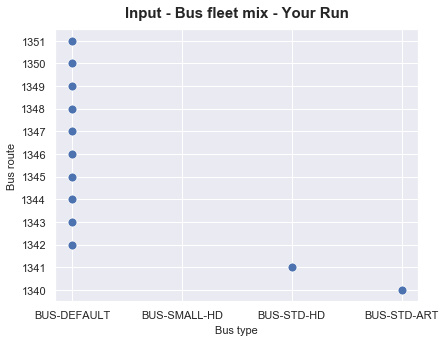

In [14]:
_ = viz.plot_vehicle_fleet_mix_inputs(fleet_mix_path_bau, route_ids, buses_list, agency_ids, "BAU")
_ = viz.plot_vehicle_fleet_mix_inputs(fleet_mix_path, route_ids, buses_list, agency_ids, "Your Run")

### Fares

Importing the `MassTransitFares.csv` input file for the BAU scenario and your new scenario.

In [15]:
fares_path_bau = path_output_folder_bau / COMPETITION / SUBMISSION_INPUTS / "MassTransitFares.csv"
fares_path = path_output_folder / COMPETITION / SUBMISSION_INPUTS / "MassTransitFares.csv"


Plotting the Mass Transit Fares inputs for the BAU scenario and your new scenario. <br><br> For the BAU, the Sioux Faux bus fare policy works as follow: 
* Children 5 yrs. and under\: FREE
* Children 6 to 10 yrs.\: \$0.75
* Children 11 to 18 yrs and Adults 65 yrs. and under: \$1.50
* Persons over 65 yrs\: FREE

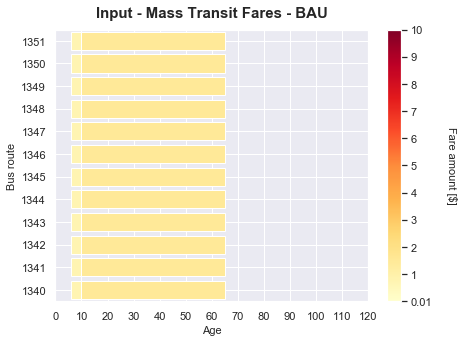

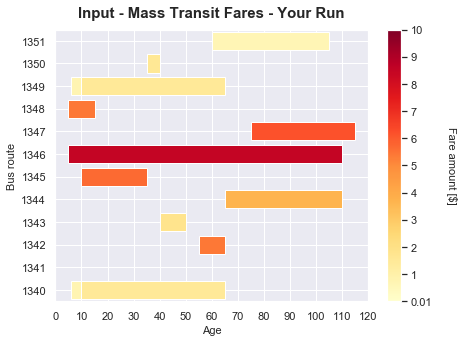

In [16]:
_ = viz.plot_mass_transit_fares_inputs(fares_path_bau, fares_path_bau, max_fare, route_ids, "BAU")
_ = viz.plot_mass_transit_fares_inputs(fares_path, fares_path_bau, max_fare, route_ids, "Your Run")

### Bus frequency

Importing the `FrequencyAdjustment.csv` input files for the BAU scenario and the new run scenario.

In [19]:
bus_frequencies_path_bau = path_output_folder_bau / COMPETITION / SUBMISSION_INPUTS / "FrequencyAdjustment.csv"
bus_frequencies_path = path_output_folder / COMPETITION / SUBMISSION_INPUTS / "FrequencyAdjustment.csv"
pd.read_csv(bus_frequencies_path)

,route_id,start_time,end_time,headway_secs


Note that the `FrequencyAdjustement.csv` input file of the BAU is empty as the BAU bus schedule is a non-frequency based schedule. There was not any function implemented to plot the frequencies.txt file of hte BAU bus schedule.
<br> Thus, this section 2.4 will be useful to plot the `FrequencyAdjustement.csv` input file of new runs (with different inputs than the BAU) only.

Plotting the `Bus frequency` inputs for the new scenario.

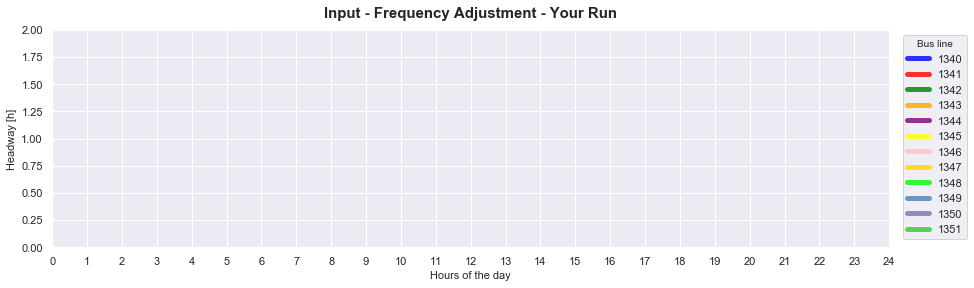

In [18]:
_ = viz.plot_bus_frequency(bus_frequencies_path, route_ids, "Your Run")

## Scores

Importing the `submissionScores.csv` file for the new scenario.

In [21]:
scores_path = path_output_folder/ COMPETITION / "submissionScores.csv"


Plotting the `weighted scores` for the new scenario. <br> When the subscore is smaller than 1, it means that the new scenario performs better than the BAU scenario.

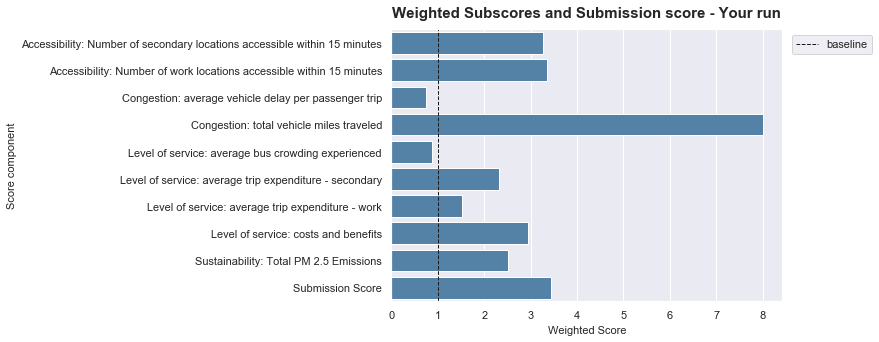

In [22]:
_ = viz.plot_weighted_scores(scores_path, "Your run")

## Mode choice

### Overall mode choice

Importing the `modeChoice.csv` output file for the BAU scenario and your new scenario.

In [23]:
mode_choice_path_bau = path_output_folder_bau / "modeChoice.csv"
mode_choice_path = path_output_folder / "modeChoice.csv"

Plotting the `Overall Mode Choice` output for the BAU scenario and your new scenario.

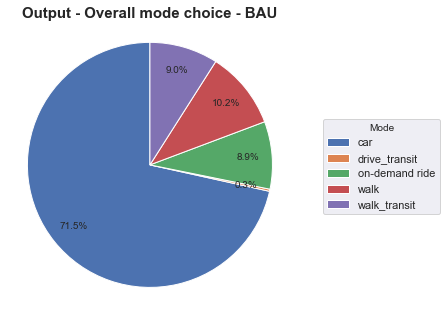

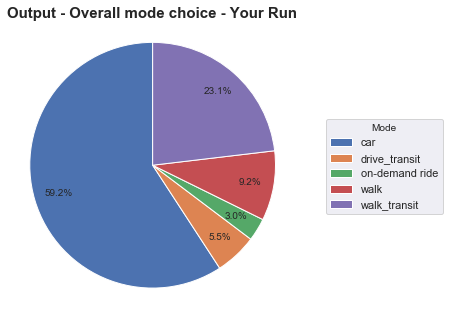

In [24]:
_ = viz.plot_overall_mode_choice(mode_choice_path_bau, "BAU")
_ = viz.plot_overall_mode_choice(mode_choice_path, "Your Run")

### Mode Choice by hour of the day

Importing the `{iter_number}.modeChoice.csv`output file. <br> (For the BAU scenario, `iter_number` = 100)

In [25]:
mode_choice_path_bau = path_output_folder_bau / ITERS / "it.100" / "100.modeChoice.csv"
mode_choice_path = path_output_folder / ITERS / ITER_FOLDER / f"{iter_number}.modeChoice.csv"


Plotting the `Mode Choice by hour of the day` output for the BAU scenario and your new scenario.

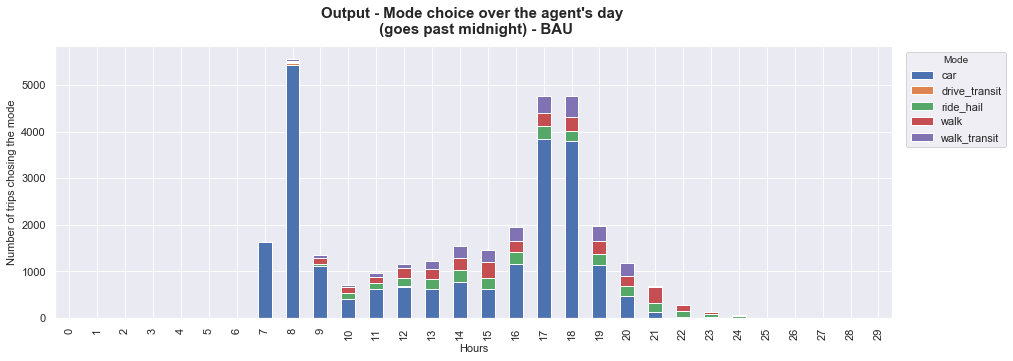

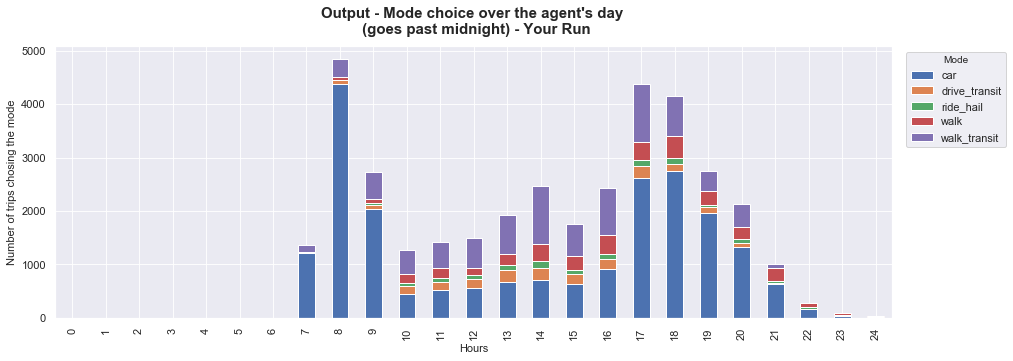

In [26]:
_ = viz.plot_mode_choice_by_hour(mode_choice_path_bau, "BAU")
_ = viz.plot_mode_choice_by_hour(mode_choice_path, "Your Run")

### Mode Choice per income group

Plotting the `Mode choice per income group` output for the BAU scenario and your new scenario.

In [29]:
trips_df_bau.head()

,Unnamed: 0,PID,Trip_ID,O_Act_ID,D_Act_ID,Purpose,plannedTripMode,Duration,Distance,FuelCost,Fare,legModes,Start_time,End_time,realizedTripMode
0,0,100-2012000131467-02126,100-2012000131467-02126_t-1,100-2012000131467-02126_a-1,100-2012000131467-02126_a-2,Work,car,1302,3692.896,0.425362,0.0,['walk' 'car'],30528.0,31830.0,drive
1,1,100-2012000131467-02126,100-2012000131467-02126_t-2,100-2012000131467-02126_a-2,100-2012000131467-02126_a-3,Home,car,994,3160.164,0.346605,0.0,['walk' 'car'],69648.0,70642.0,drive
2,2,100-2012000131467-02169,100-2012000131467-02169_t-1,100-2012000131467-02169_a-1,100-2012000131467-02169_a-2,Work,car,1980,6055.095,0.733383,0.0,['walk' 'car'],28839.0,30819.0,drive
3,3,100-2012000131467-02169,100-2012000131467-02169_t-2,100-2012000131467-02169_a-2,100-2012000131467-02169_a-3,Home,car,1909,5659.777,0.704340,0.0,['car'],63941.0,65850.0,car
4,4,100-2012000131467-02212,100-2012000131467-02212_t-1,100-2012000131467-02212_a-1,100-2012000131467-02212_a-2,Work,car,1700,2089.979,0.306502,0.0,['car' 'walk'],32996.0,34696.0,drive


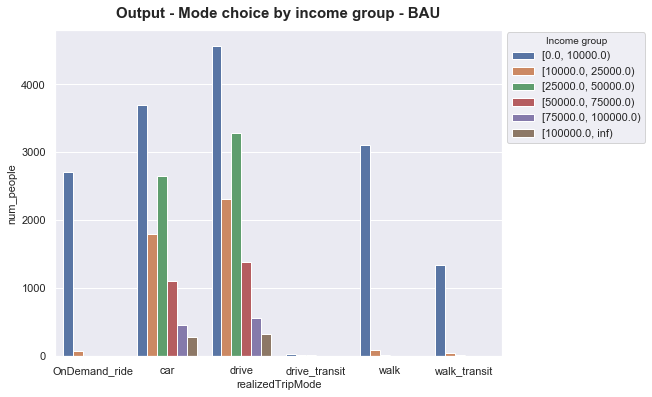

In [28]:
_ = viz.plot_mode_choice_by_income_group(person_df_bau, trips_df_bau, "BAU")
# _ = viz.plot_mode_choice_by_income_group(person_df, trips_df, "Your Run")

### Mode Choice per age group

Plotting the `Mode choice per age group` output for the BAU scenario and your new scenario..

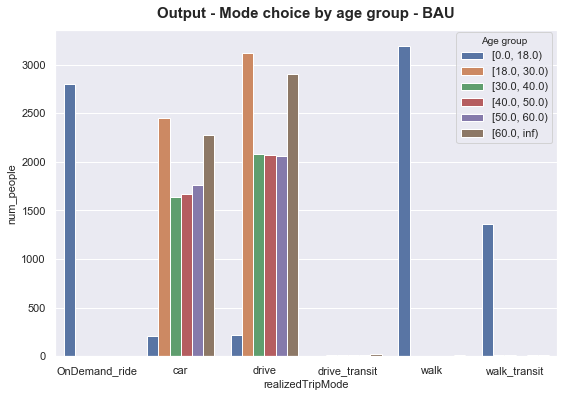

In [29]:
_ = viz.plot_mode_choice_by_age_group(person_df_bau, trips_df_bau, "BAU")
# _ = viz.plot_mode_choice_by_age_group(person_df, trips_df, "Your Run")

## Accessibility

The data needed for this plot has not been processed yet. Therefore, the plot will not be accessible for the Hackathon.

### Work-based trips

In [33]:
# _ = viz.plot_accessibility(sample_name, network_file, bau_linkstats_file, population_file, utm_zone, poi_types, time_ranges, max_time, morning_peak, evening_peak, "BAU")


### Secondary locations trips

## Level of service

### Travel expenditure

The data needed for this plot has not been processed yet. Therefore, the plot will not be accessible for the Hackathon.

In [32]:
# _ = viz.plot_average_travel_expenditure_per_trip_per_mode_over_day(trips_df_bau, "BAU")
# _ = viz.plot_average_travel_expenditure_per_trip_per_mode_over_day(trips_df, "Your Run")

### Bus crowding

Plotting the `Average Hours of Bus Crowding` output for the BAU scenario and your new scenario.

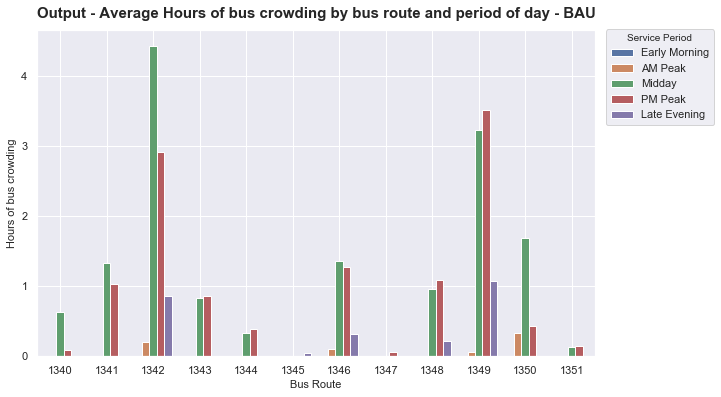

In [35]:
_ = viz.plot_average_bus_crowding_by_bus_route_by_period_of_day(paths_traversals_df_bau, trip_to_route, seating_capacities,transit_scale_factor, "BAU")
# _ = viz.plot_average_bus_crowding_by_bus_route_by_period_of_day(paths_traversals_df, trip_to_route, seating_capacities,transit_scale_factor, "Your Run")


## Congestion

### Average travel time by mode

Importing the `averageTravelTimes.csv` output file for the BAU scenario and your new scenario.

In [36]:
travel_time_data_bau = path_output_folder_bau / ITERS / "it.100" / "100.averageTravelTimes.csv"
travel_time_data = path_output_folder / ITERS / ITER_FOLDER / f"{iter_number}.averageTravelTimes.csv"

Plotting the `Average travel time by mode` output.

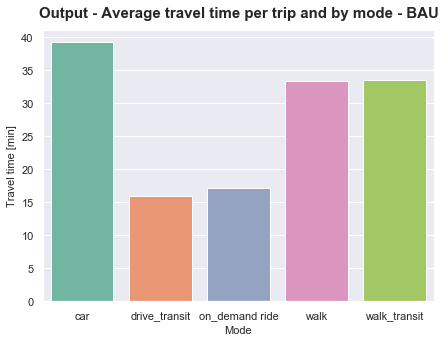

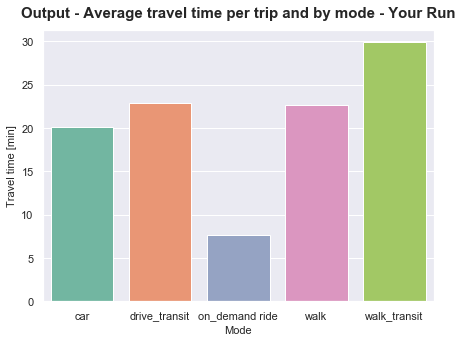

In [37]:
_ = viz.plot_travel_time_by_mode(travel_time_data_bau, "BAU")
_ = viz.plot_travel_time_by_mode(travel_time_data, "Your Run")

### Travel time by mode over the day

Plotting the `Travel time by mode over the day` output for the BAU scenario and your new scenario.

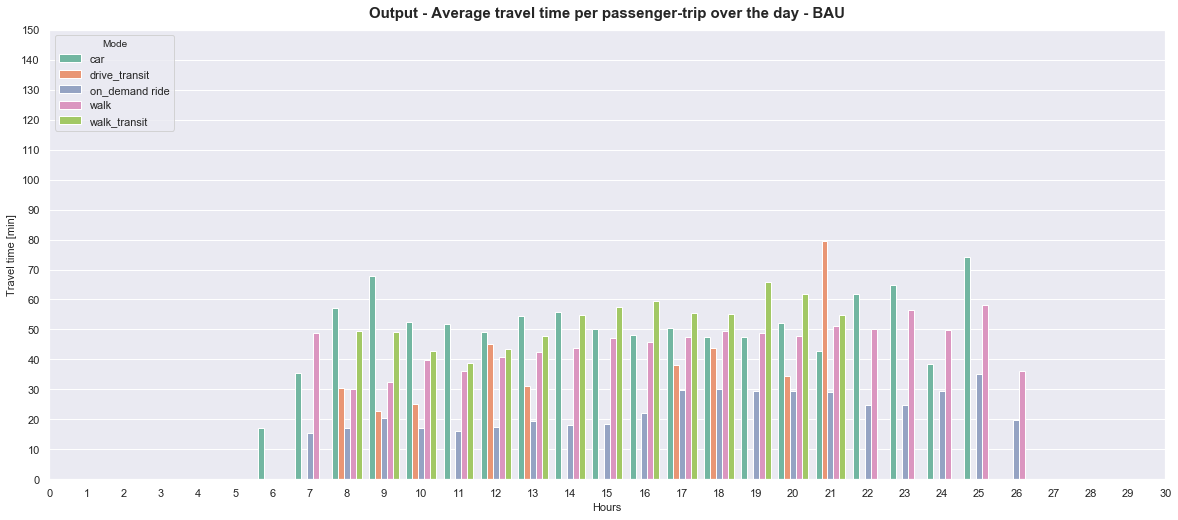

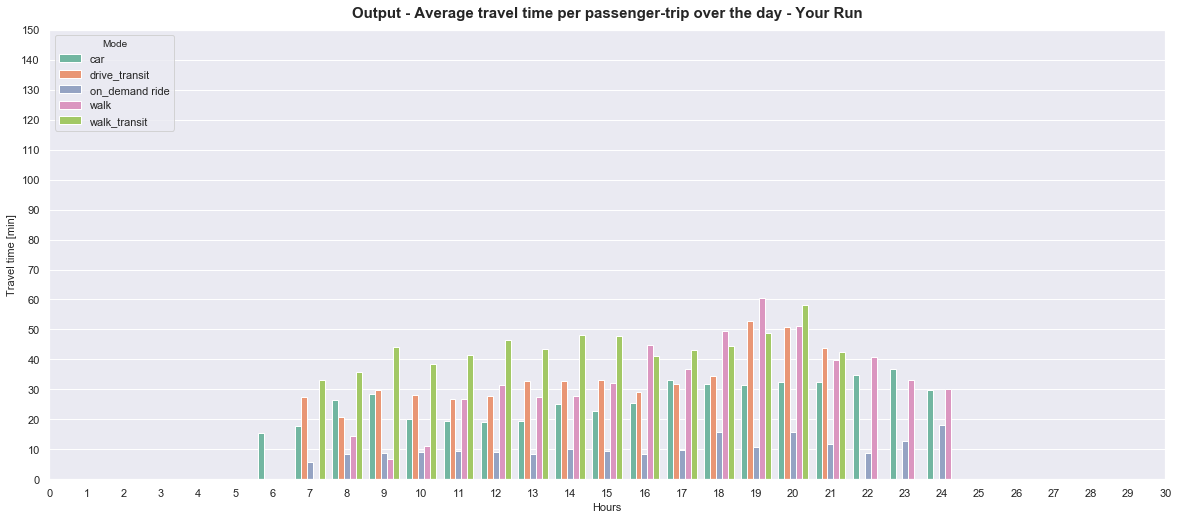

In [38]:
_ = viz.plot_travel_time_over_the_day(travel_time_data_bau, "BAU")
_ = viz.plot_travel_time_over_the_day(travel_time_data, "Your Run")


## Costs and Benefits of Mass Transit Level of Service Intervention

Plotting the `Costs and Benefits by route` output for the BAU scenario and your new scenario.

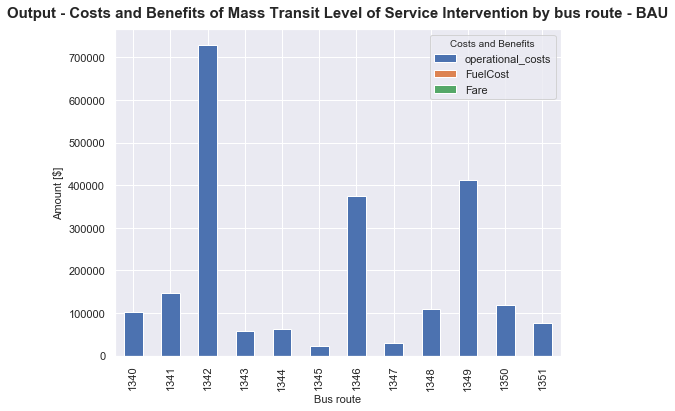

In [58]:
_ = viz.plot_cost_benefits(paths_traversals_df_bau, legs_df_bau, operational_costs, trip_to_route, "BAU")
# _ = viz.plot_cost_benefits(legs_df, operational_costs, trip_to_route, "Run")

## Sustainability

The data needed for this plot has not been processed yet. Therefore, the plot will not be accessible for the Hackathon.